https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.backend import clear_session
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# generate fake data


In [25]:
x1 = np.arange(100)
x2 = np.arange(100)
x = np.column_stack((x1, x2))
y = x1 + x2

# x = x1.reshape(-1, 1)
# y = 0.5 * x

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
x_train.shape

(80, 2)

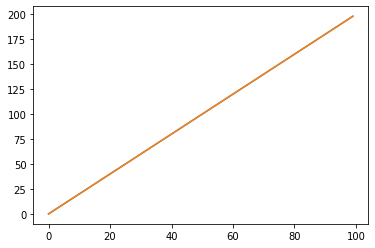

In [26]:
plt.plot(x, y)


scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(x.reshape(-1, 1))
scaler_y.fit(y.reshape(-1,1))
x_train_norm = scaler_x.transform(x_train.reshape(-1, 1))
y_train_norm = scaler_y.transform(y_train.reshape(-1, 1))

x_train_norm.shape


plt.plot(x_train_norm, y_train_norm)

In [27]:
clear_session()
nn_model = Sequential()
# # input layer
# nn_model.add(Dense(2, input_dim=x_train.shape[1], activation="relu"))

# # 2nd layer
# nn_model.add(Dense(2, activation="relu"))
# output layer
nn_model.add(Dense(1, input_dim=x_train.shape[1], activation="linear"))

In [28]:
# nn_model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])
nn_model.compile(loss="huber", optimizer="adam", metrics=["mean_squared_error"])

nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [29]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
callbacks_list = [checkpoint]

In [30]:
# nn_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=.15,)
history = nn_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=.15, callbacks=[es,])

Epoch 1/500
3/3 [==============================] - 1s 121ms/step - loss: 137.3367 - mean_squared_error: 24271.9648 - val_loss: 134.7402 - val_mean_squared_error: 23736.5859
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 137.0285 - mean_squared_error: 24164.1250 - val_loss: 134.4344 - val_mean_squared_error: 23629.6016
Epoch 3/500
3/3 [==============================] - 0s 23ms/step - loss: 136.7151 - mean_squared_error: 24054.3926 - val_loss: 134.1330 - val_mean_squared_error: 23524.4219
Epoch 4/500
3/3 [==============================] - 0s 21ms/step - loss: 136.4082 - mean_squared_error: 23948.4707 - val_loss: 133.8271 - val_mean_squared_error: 23417.8613
Epoch 5/500
3/3 [==============================] - 0s 20ms/step - loss: 136.0986 - mean_squared_error: 23841.2949 - val_loss: 133.5220 - val_mean_squared_error: 23311.8438
Epoch 6/500
3/3 [==============================] - 0s 25ms/step - loss: 135.7872 - mean_squared_error: 23732.8047 - val_loss: 133.2170 - va

In [31]:
for layer in nn_model.layers: 
    print(layer.weights)

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.58525413],
       [1.3960882 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.2487279], dtype=float32)>]


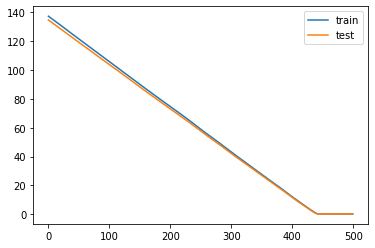

In [32]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plt.show()

In [33]:
y_pred = nn_model.predict(x_test)

(20,)

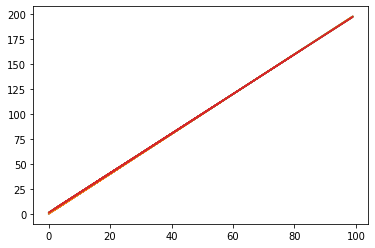

In [34]:
plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
y_test.shape